# RASTER DATA PROCESSING

RASTER DATA REPRESENTS OBJ/VAR ON THE EARTH'S SURFACE AS A MATRIX OR VALUE, IN THE FORM OF PIXELS, CELL, OR GRIDS

LAYERS AND BANDS
A raster is an image with a matrix of values representing the value of some observed attributes. Bands of raster corresponds to different variables, usually using the same matrix structure

### Raster Bands

Some raster have a single or bultiple band. a band is represented by a single matrix of cell values, and a raster with multiple bands contains multiple spatially coincident matrices of cells value representing the same spatial area.

A sat image is a multiband image representing different wavelength combination of multi band forms one true natural color composite (rgb)

#### Single Band Raster - Binary Image, Grayscale Image, Color Map Image

### GDAL
Geospatial data abstraction library is a translator library for raster and vector data formats. It presents a single raster abstract data model and single vector abstract data model to the calling applicationfor all supported formats.

Ex: Spatial variablity of temperature, elevation, rainfall, etc. over a region

### GDAL RASTER DATA MODEL
- A dataset is an assemply of related raster bands asnd some infoermation commo to tel them
- A dataset has a concept of raster size
- A dataset is also responsible for the rasyer size
- A dataset is alos responsible for the georeferening transform and coordinate system definition of all  bands
- A dataset itself can also have a associated metadata, a lost of names/ value pair in string format.

#### MAP PROJECTION:
A map projection is a way to flatten a earth's surface into a plane in order to make a map by using mathematical methods. With every projection there are its own coordinate system to point into that map projection.

 #### GEOTRANSFORM

 A geotransform is an affine transformation from the image coordinate space (row, column), also known as (pixel, line) to the georeferenced coordinate space.

 *A geotransform consist in a set of 6 coefficient*
 - GT(0) x-coordinate of the upper-left corner of the upper-left pixel
 - GT(1) w-e pixel resolution/pixel width
 - GT(2) row rotation (typically zero)
 - GT(3) y-coordinate of the upper left corner of the upper-left pixel
 - GT(4) column rotation (typically zero)
 - GT(5) n-s pixel resolution/pixel height (negative value for a north-up)

   ## GDAL IN ACTION

In [2]:
import os
os.chdir(r'C:\Users\Jarvis\Desktop\All Python\GIS\data')

In [4]:
#Command with ! in gdal library is a system command
!gdalinfo -nomd L3-NC44B10-102-065-05May19-BAND2.tif

# Shows all information regarding tif file downloaded. 

Driver: GTiff/GeoTIFF
Files: L3-NC44B10-102-065-05May19-BAND2.tif
Size is 1151, 1151
Coordinate System is:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    USAGE[
        SCOPE["unknown"],
        AREA["World"],
        BBOX[-90,-180,90,180]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
Origin = (79.495500000000007,11.754500000000000)
Pixel Size = (0.000225021720243,-0.000225021720243)
Corner Coordinates:
Upper Left  (  79.4955000,  11.7545000) ( 79d29'43.80"E, 11d45'16.20"N)
Lower Left  (  79.4955000,  11.4955000) ( 79d29'43.80"E, 11d29'43.8

### GETTING RASTER INFORMATION WITH PYTHON

A TIFF, which stands for Tag Image File Format, is a computer file used to store raster graphics and image information. 

In [6]:
# Getting same information using python
#osgeo is name of package, gdal is library
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
#from pathlib import path
import os
from osgeo import osr
import math

In [8]:
file_name = 'L3-NC44B10-102-065-05May19-BAND2.tif'

In [9]:
ds = gdal.Open(file_name)
ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x0000026ECAB8F750> >

In [11]:
print('File List: ', ds.GetFileList())

File List:  ['L3-NC44B10-102-065-05May19-BAND2.tif']


In [15]:
print('Height: ', ds.RasterXSize)
print('Width: ', ds.RasterYSize)
print('Coordinate System: ', ds.GetProjection)

Height:  1151
Width:  1151
Coordinate System:  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


In [17]:
#Geo Transformation System
gt = ds.GetGeoTransform()
gt

#(x, pixel in x dirn, totation, lati of top left pixel)

(79.4955, 0.00022502172024325468, 0.0, 11.7545, 0.0, -0.00022502172024326702)

In [18]:
#Origin Data and pixel size
print('Origin: ', (gt[0], gt[3]))
print('Pixel Size: ', (gt[1], gt[5]))

Origin:  (79.4955, 11.7545)
Pixel Size:  (0.00022502172024325468, -0.00022502172024326702)


In [20]:
#Calculating real world coordinates
#convert image coord to lat and longi
#three arg: gt, pix no, line no
print('Upper left corner: ', gdal.ApplyGeoTransform(gt, 0, 0))
print('Upper right corner: ', gdal.ApplyGeoTransform(gt, ds.RasterXSize, 0))
print('Lower left corner: ', gdal.ApplyGeoTransform(gt, 0, ds.RasterYSize))
print('Lower right corner:', gdal.ApplyGeoTransform(gt, ds.RasterXSize, ds.RasterYSize))
print('Center:', gdal.ApplyGeoTransform(gt, ds.RasterXSize/2, ds.RasterYSize/2))



Upper left corner:  [79.4955, 11.7545]
Upper right corner:  [79.7545, 11.7545]
Lower left corner:  [79.4955, 11.4955]
Lower right corner: [79.7545, 11.4955]
Center: [79.625, 11.625]


In [21]:
# Extracting Metadata
print('Metadata: ', ds.GetMetadata())

Metadata:  {'AREA_OR_POINT': 'Area'}


In [22]:
#pretty printing
import pprint

In [24]:
print('Image Structure Metadata: ', ds.GetMetadata('IMAGE_STRUCTURE'))
print('Number of bands: ', ds.RasterCount)

Image Structure Metadata:  {'INTERLEAVE': 'BAND'}
Number of bands:  1


In [28]:
#if there are muntiple bands, this gives details of all badn details
for i in range(1, ds.RasterCount+1):
    
    #fetching particular band
    band = ds.GetRasterBand(i) #In GDal, indexing starts with 1 not 0
    interp = band.GetColorInterpretation()
    interp_name = gdal.GetColorInterpretationName(interp)
    (w,h) = band.GetBlockSize()
    ovr_count = band.GetOverviewCount()
    for j in range(ovr_count):
        ovr_band = band.GetOverview(j) #overview band indexing start with 0
        print('Overview %d: %dx%d'%(j, ovr_band.XSize, ovr_band.YSize))

In [29]:
#deleting dataset
del ds

In [30]:
gdal.Info('L3-NC44B10-102-065-05May19-BAND2.tif')

'Driver: GTiff/GeoTIFF\nFiles: L3-NC44B10-102-065-05May19-BAND2.tif\nSize is 1151, 1151\nCoordinate System is:\nGEOGCRS["WGS 84",\n    DATUM["World Geodetic System 1984",\n        ELLIPSOID["WGS 84",6378137,298.257223563,\n            LENGTHUNIT["metre",1]]],\n    PRIMEM["Greenwich",0,\n        ANGLEUNIT["degree",0.0174532925199433]],\n    CS[ellipsoidal,2],\n        AXIS["geodetic latitude (Lat)",north,\n            ORDER[1],\n            ANGLEUNIT["degree",0.0174532925199433]],\n        AXIS["geodetic longitude (Lon)",east,\n            ORDER[2],\n            ANGLEUNIT["degree",0.0174532925199433]],\n    USAGE[\n        SCOPE["unknown"],\n        AREA["World"],\n        BBOX[-90,-180,90,180]],\n    ID["EPSG",4326]]\nData axis to CRS axis mapping: 2,1\nOrigin = (79.495500000000007,11.754500000000000)\nPixel Size = (0.000225021720243,-0.000225021720243)\nMetadata:\n  AREA_OR_POINT=Area\nImage Structure Metadata:\n  INTERLEAVE=BAND\nCorner Coordinates:\nUpper Left  (  79.4955000,  11.75

### IMAGE VISUALIZATION

In [33]:
#single band

ds = gdal.Open('L3-NC44B10-102-065-05May19-BAND2.tif')
#fetching band 1
band = ds.GetRasterBand(1)
band

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x0000026ECAB8F210> >

In [34]:
#band contain data and overview to removing overview and seeing only array
data=band.ReadAsArray()
data

array([[115, 107, 109, ..., 153, 149, 169],
       [133, 122, 112, ..., 153, 167, 179],
       [127, 115, 112, ..., 157, 167, 166],
       ...,
       [138, 129, 140, ..., 145, 143, 152],
       [140, 145, 147, ..., 118, 115, 127],
       [171, 173, 175, ..., 125, 123, 113]], dtype=uint16)

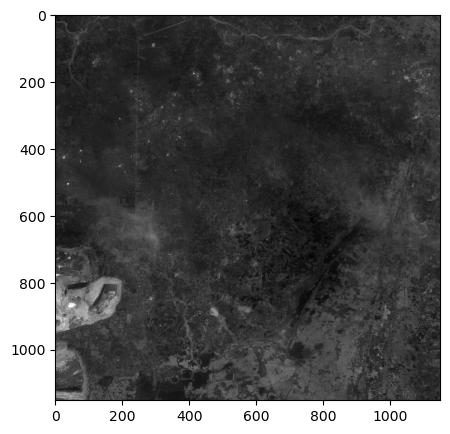

In [38]:
#plotting image
plt.figure(figsize = (5,5)) #size of image on plotting space
plt.imshow(data, cmap='gray')

#use for loop to print all image band if there are more than 1

In [39]:
plt.close()

#### VISUALIZE MULTI BAND RASTER

Though there are many possible combination of wavelength bands, the earth observatory typizally selects combi based on the event or feature we want to illustrate. 
For instance, floods are best viewed in shortwave infrared, near infrared and green light because muddy water blends with brown land in nature color image.

In [49]:
multi_data = ds.ReadAsArray(band_list=[1]) #add more bands if present in image